In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
num = 10
dir = "test_project/results/LHS"
files = [f"run_{i}_ogs.log" for i in range(num)]

In [13]:
from ogstools.logparser import (
    fill_ogs_context,
    parse_file,
    analysis_time_step,
    time_step_vs_iterations,
)

records = []
for i in range(num):
    records.append(parse_file(f"{dir}/{files[i]}"))
df_records = [pd.DataFrame(record) for record in records]
df_logs = [fill_ogs_context(record) for record in df_records]
df_ts_it = [time_step_vs_iterations(df_log) for df_log in df_logs]
df_ts = [analysis_time_step(df_log) for df_log in df_logs]


In [17]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,num)))

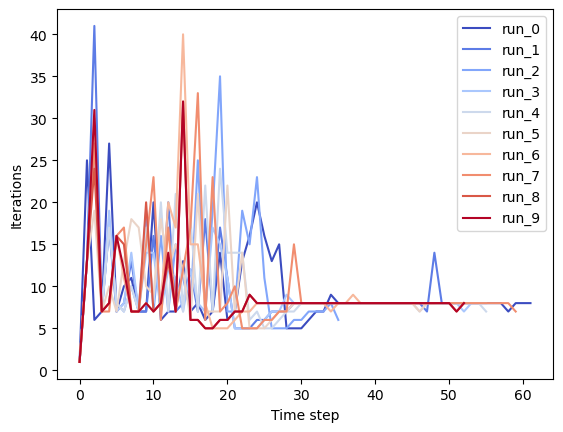

In [18]:
for i, entry in enumerate(df_ts_it):
    plt.plot(entry, label=f"run_{i}")
plt.xlabel("Time step")
plt.ylabel("Iterations")
plt.legend()

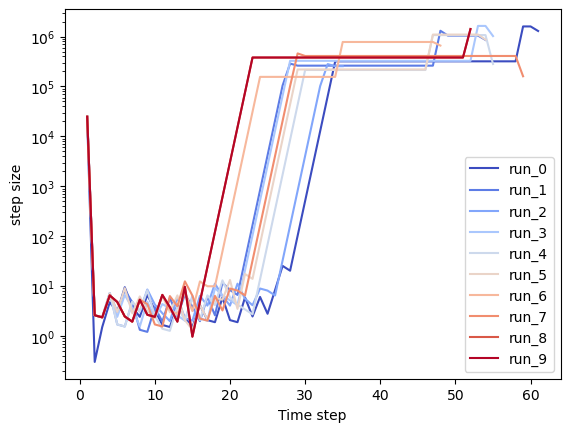

In [19]:
for i, entry in enumerate(df_ts):
    plt.plot(entry.loc[0]["step_size"], label=f"run_{i}")
plt.xlabel("Time step")
plt.ylabel("step size")
plt.yscale("log")
plt.legend()

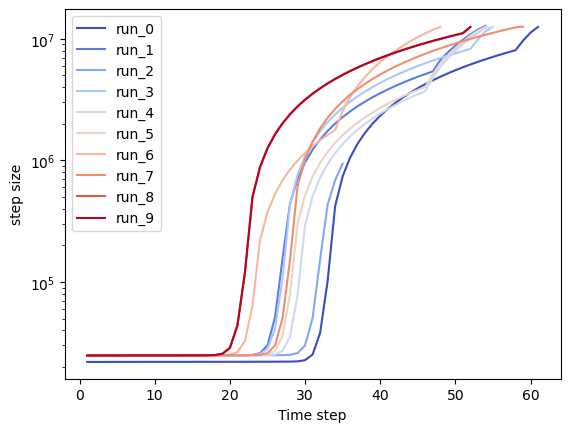

In [24]:
for i, entry in enumerate(df_ts):
    plt.plot(entry.loc[0]["step_size"].cumsum(), label=f"run_{i}")
plt.xlabel("Time step")
plt.ylabel("step size")
plt.yscale("log")
plt.legend()